## Transfer Learning Resnet 50 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
len(folders)
#listdir(folders)

0

In [ ]:
#prediction = Dense(len(folders), activation='softmax')(x)
prediction = Dense(4, activation='softmax')(x)
# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-27-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
61/61 [==============================] - 50s 763ms/step - loss: 3.3063 - accuracy: 0.4070 - val_loss: 1.6191 - val_accuracy: 0.2778
Epoch 2/20
61/61 [==============================] - 41s 679ms/step - loss: 1.1152 - accuracy: 0.5510 - val_loss: 0.9233 - val_accuracy: 0.7222
Epoch 3/20
61/61 [==============================] - 41s 680ms/step - loss: 0.8603 - accuracy: 0.6392 - val_loss: 0.8969 - val_accuracy: 0.6667
Epoch 4/20
61/61 [==============================] - 41s 672ms/step - loss: 0.7579 - accuracy: 0.7002 - val_loss: 0.9213 - val_accuracy: 0.5556
Epoch 5/20
61/61 [==============================] - 41s 676ms/step - loss: 0.8806 - accuracy: 0.6540 - val_loss: 0.6690 - val_accuracy: 0.7778
Epoch 6/20
61/61 [==============================] - 41s 669ms/step - loss: 0.8246 - accuracy: 0.6807 - val_loss: 0.9610 - val_accuracy: 0.6111
Epoch 7/20
61/61 [==============================] - 41s 669ms/step - loss: 0.9784 - accuracy: 0.6402 - val_loss: 1.2860 - val_accuracy: 0.7778

In [ ]:
import matplotlib.pyplot as plt

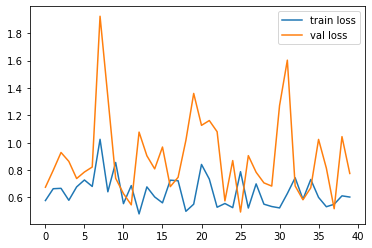

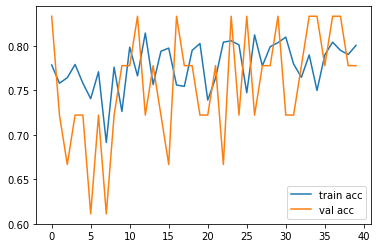

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


1/1 [==============================] - 4s 4s/step


In [ ]:
y_pred

array([[3.38251889e-02, 3.97692293e-01, 5.67125618e-01, 1.35684269e-03],
       [7.99935460e-01, 1.91866994e-01, 6.49113534e-03, 1.70637493e-03],
       [6.78534052e-05, 9.97866690e-01, 1.31165516e-05, 2.05243845e-03],
       [2.56020052e-04, 9.99591291e-01, 5.69268086e-05, 9.56793810e-05],
       [1.56212598e-04, 2.14413017e-01, 8.02137926e-02, 7.05216944e-01],
       [1.34621796e-05, 9.87551928e-01, 1.18471310e-02, 5.87482296e-04],
       [3.44524483e-06, 4.81388396e-09, 9.99996543e-01, 5.75421322e-10],
       [7.83419891e-05, 9.85143483e-01, 1.31761646e-02, 1.60201348e-03],
       [1.70466409e-03, 7.15003550e-01, 2.81733483e-01, 1.55831233e-03],
       [1.02261885e-03, 1.53687596e-01, 2.21410215e-01, 6.23879552e-01],
       [7.04271588e-05, 1.45921304e-05, 9.99913812e-01, 1.22105951e-06],
       [9.93197203e-01, 9.25763175e-07, 6.77730003e-03, 2.45302363e-05],
       [1.20602754e-08, 7.69257213e-10, 1.00000000e+00, 8.77297435e-09],
       [2.29191428e-04, 4.15040791e-01, 1.18413687e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 0, 1, 1, 3, 1, 2, 1, 1, 3, 2, 0, 2, 3, 3, 2, 2, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img_data

NameError: ignored

In [ ]:
img=image.load_img('/content/drive/MyDrive/1_Cotton-Disease-Prediction-Deep-Learning-master (1)/Datasets/test/diseased cotton leaf/dis_leaf (248).jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[213., 180., 135.],
        [212., 179., 134.],
        [222., 190., 141.],
        ...,
        [154., 192.,  89.],
        [220., 243., 155.],
        [229., 250., 171.]],

       [[228., 195., 150.],
        [229., 196., 151.],
        [220., 187., 142.],
        ...,
        [190., 225., 123.],
        [227., 249., 167.],
        [230., 251., 172.]],

       [[217., 184., 139.],
        [221., 189., 140.],
        [215., 182., 137.],
        ...,
        [172., 210.,  99.],
        [230., 251., 172.],
        [229., 250., 171.]],

       ...,

       [[ 82., 151.,  62.],
        [ 86., 154.,  69.],
        [ 87., 155.,  70.],
        ...,
        [ 72.,  65.,  47.],
        [ 79.,  72.,  54.],
        [ 79.,  73.,  51.]],

       [[ 81., 151.,  65.],
        [ 79., 147.,  62.],
        [ 80., 148.,  63.],
        ...,
        [ 79.,  73.,  51.],
        [ 77.,  71.,  49.],
        [ 70.,  64.,  42.]],

       [[ 90., 154.,  70.],
        [103., 171.,  86.],
        [ 91., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 0s 27ms/step


array([[2.4380414e-08, 1.5757041e-34, 1.0000000e+00, 1.8058275e-37]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 255ms/step


In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'